## Hw 1a: Batched Image Manipulation with PyTorch Tensors

### Instructions

This assignment focuses on manipulating images using **PyTorch tensor operations**.  
You will implement various image filters and transformations using **only PyTorch**, without relying on any external image processing libraries (e.g., PIL, OpenCV, torchvision transforms).

### Image Format

All images are represented as PyTorch tensors in one of the following shapes:

- **Single image:** `(C, H, W)`
- **Batch of images:** `(N, C, H, W)`

Where:
- `N` = number of images in the batch  
- `C` = number of channels (3 for RGB, 1 for grayscale)  
- `H` = height in pixels  
- `W` = width in pixels  
- Pixel values are **normalized to the range [0, 1]**

### Rules

- **All functions must support batched inputs**, i.e., they should operate on tensors with shape `(N, C, H, W)` but should also accept unbatched inputs of shape `(C, H, W)`
  
- Use **only PyTorch tensor operations**.  
  Do **not** use external image processing libraries (e.g., PIL, OpenCV, torchvision) for the core image manipulation logic.

- All functions must **preserve the input tensor’s `dtype`** (e.g., `float32` remains `float32` after processing).

*Tip:* Use `tensor.ndim` or `tensor.dim()` to distinguish between single image (3D) and batched image (4D) inputs.

### Testing Your Code

We have provided a set of test cases in the file: `test_image_manipulation.py`

You can run the tests from the terminal using:

```bash
pytest test_image_manipulation.py
```

### Deliverables:
Implement all function in `image_manipulation.py`.

In [23]:
#loads the autoreload extension.
%load_ext autoreload 
# automatically reloads all modules every time you execute a cell. 
# This is useful when you're editing code in external files 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [30]:
torch.randint(0, 5, (1,))

tensor([2])

In [46]:
from image_manipulation import apply_brightness, apply_contrast, rgb_to_grayscale, \
        horizontal_flip, crop_center, random_crop, add_black_border, numpy_to_torch_batch

In [69]:
# reading an image
# it gets read as a numpy array
img = plt.imread('data/cat1.png')
img.shape

(256, 256, 3)

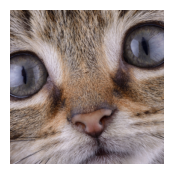

In [70]:
# Display the image
plt.figure(figsize=(2, 2))  
plt.imshow(img)
plt.axis('off')  # optional: hides axes
plt.show()

In [71]:
def visualize_tensor_image(tensor_img, color=True):
    plt.figure(figsize=(2, 2))  
    np_img = tensor_img.permute(1, 2, 0).numpy()
    if color:
        plt.imshow(np_img)
    else:
        plt.imshow(np_img, cmap='gray')
    plt.axis('off')  # optional: hides axes
    plt.show()

`torch.from_numpy(img)` converts the NumPy array img to a PyTorch tensor.
`.permute(2, 0, 1)` reorders the dimensions of the tensor (from (H, W, C)) to match PyTorch’s expected format: (C, H, W) 

In [72]:
tensor_img = torch.from_numpy(img).permute(2, 0, 1)

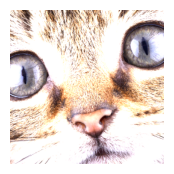

In [73]:
tensor_img_2 = apply_brightness(tensor_img, 2)
visualize_tensor_image(tensor_img_2)

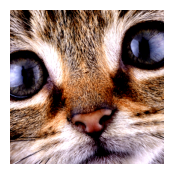

In [74]:
tensor_img_2 = apply_contrast(tensor_img, 2)
visualize_tensor_image(tensor_img_2)

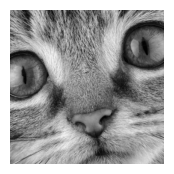

In [75]:
tensor_img_2 = rgb_to_grayscale(tensor_img)
visualize_tensor_image(tensor_img_2, color=False)

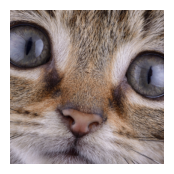

In [76]:
tensor_img_2 = horizontal_flip(tensor_img)
visualize_tensor_image(tensor_img_2)

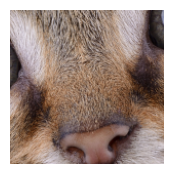

In [77]:
tensor_img_2 = crop_center(tensor_img, 150, 150)
visualize_tensor_image(tensor_img_2)

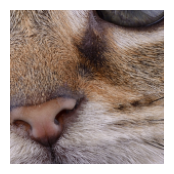

In [78]:
# run it mulpiple times
tensor_img_2 = random_crop(tensor_img, 150, 150)
visualize_tensor_image(tensor_img_2)

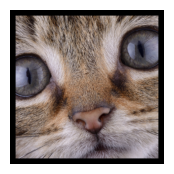

In [79]:
border_size = 10
image = torch.from_numpy(img).permute(2, 0, 1)
image2 = add_black_border(image, border_size)
visualize_tensor_image(image2)

In [81]:
files = ["data/cat1.png", "data/cat2.png", "data/cat3.png"]
image_list = [plt.imread(f) for f in files]

In [82]:
batch_imgs = numpy_to_torch_batch(image_list)
batch_imgs.shape

torch.Size([3, 3, 256, 256])

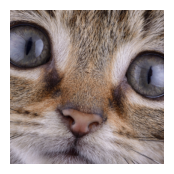

In [83]:
batch_imgs_2 = horizontal_flip(batch_imgs)
visualize_tensor_image(batch_imgs_2[0])

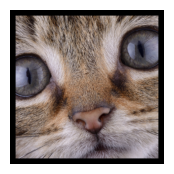

In [84]:
border_size = 10

batch_imgs_2 = add_black_border(batch_imgs, border_size)
visualize_tensor_image(batch_imgs_2[0])

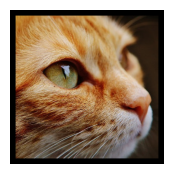

In [85]:
visualize_tensor_image(batch_imgs_2[1])

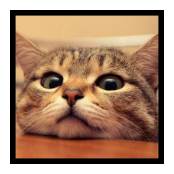

In [86]:
visualize_tensor_image(batch_imgs_2[2])